In [2]:
###################
# Import Libraries
###################

import pandas as pd # coding but excel
import numpy as np # number stuff, creates arrays
import matplotlib.pyplot as plt # plotting
from scipy.optimize import curve_fit # curve fit class

# Data Visual Analysis
The important detail here is we see that B to C and B to R are the same, so we really don't care about B to R. Also, B to Q is not zero, which is really weird. That is not theoretically expexted, and we may need to retake the data, or investigate further to understand.

Measure B to C: 
    Reading         Value
0 -0.000068 -9.727700e-09
1  0.001678  9.994596e-06
2  0.003418  1.999542e-05
3  0.005157  2.998640e-05
4  0.006898  3.998891e-05, 
Measure B to Q: 
     Reading         Value
0  0.000360 -1.000700e-08
1  0.037676  9.994242e-06
2  0.075962  1.999492e-05
3  0.102019  2.998576e-05
4  0.122989  3.998816e-05, 
Measure B to R: 
    Reading         Value
0 -0.000002 -9.797600e-09
1  0.001735  9.994524e-06
2  0.003469  1.999556e-05
3  0.005204  2.998617e-05
4  0.006939  3.998855e-05


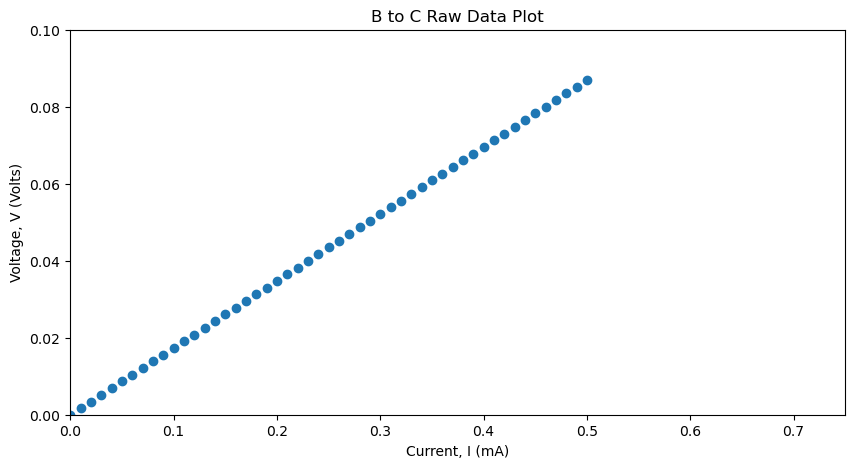

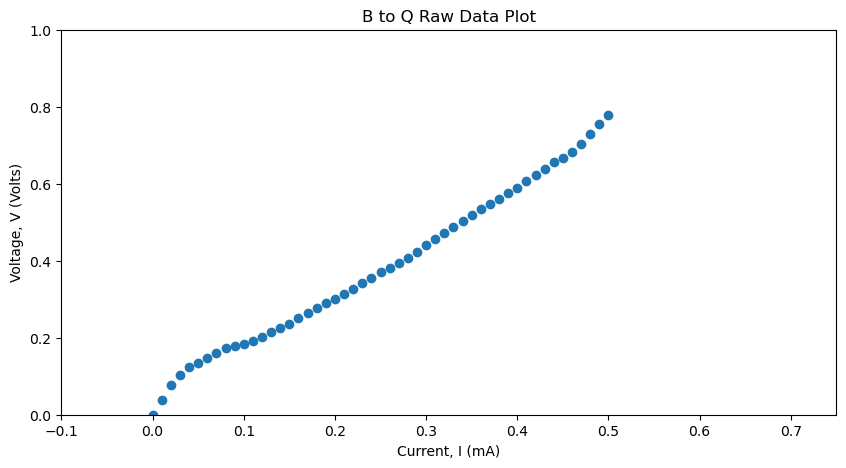

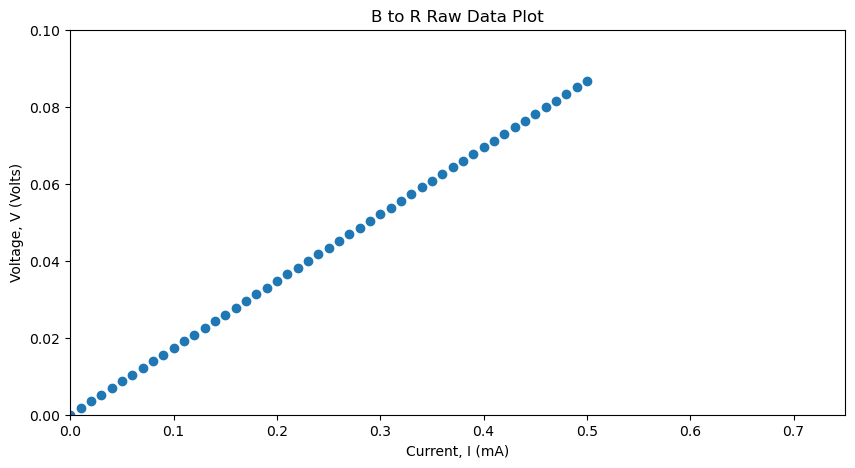

In [9]:
##############
# Import data
##############

BC_df = pd.read_csv("ST-C2-BC.csv")
BQ_df = pd.read_csv("ST-C2-BQ.csv")
BR_df = pd.read_csv("ST-C2-BR.csv")

print(f"Measure B to C: \n{BC_df.head()}, \nMeasure B to Q: \n {BQ_df.head()}, \nMeasure B to R: \n{BR_df.head()}")


##############
# Plot data
##############

BC_x = 1E3*BC_df["Value"] # grab column, we're converting to mA
BC_y = BC_df["Reading"] # grab column
plt.figure(figsize=(10,5)) # set figure size
plt.xlim(0, 0.75) # x axis limits
plt.ylim(0, 0.1) # y axis limits
plt.xlabel("Current, I (mA)") # x axis label
plt.ylabel("Voltage, V (Volts)") # y axis label
plt.title("B to C Raw Data Plot") # plot title
plt.plot(BC_x, BC_y, 'o') # plot data
plt.show()

BQ_x = 1E3*BQ_df["Value"] # grab column
BQ_y = BQ_df["Reading"] # grab column
plt.figure(figsize=(10,5)) # set figure size
plt.xlim(-0.1, 0.75) # x axis limits
plt.ylim(0, 1) # y axis limits
plt.xlabel("Current, I (mA)") # x axis label
plt.ylabel("Voltage, V (Volts)") # y axis label
plt.title("B to Q Raw Data Plot") # plot title
plt.plot(BQ_x, BQ_y, 'o')
plt.show()

BR_x = 1E3*BR_df["Value"] # grab column
BR_y = BR_df["Reading"] # grab column
plt.figure(figsize=(10,5)) # set figure size
plt.xlim(0, 0.75) # x axis limits
plt.ylim(0, 0.1) # y axis limits
plt.xlabel("Current, I (mA)") # x axis label
plt.ylabel("Voltage, V (Volts)") # y axis label
plt.title("B to C Raw Data Plot") # plot title
plt.title("B to R Raw Data Plot")
plt.plot(BR_x, BR_y, 'o')
plt.show()

# Data Fitting w/ Uncertainties
We're going to set up our linear fit. Plot it to visualize how awesome it is. To finish we always print our key variables and their uncertainty

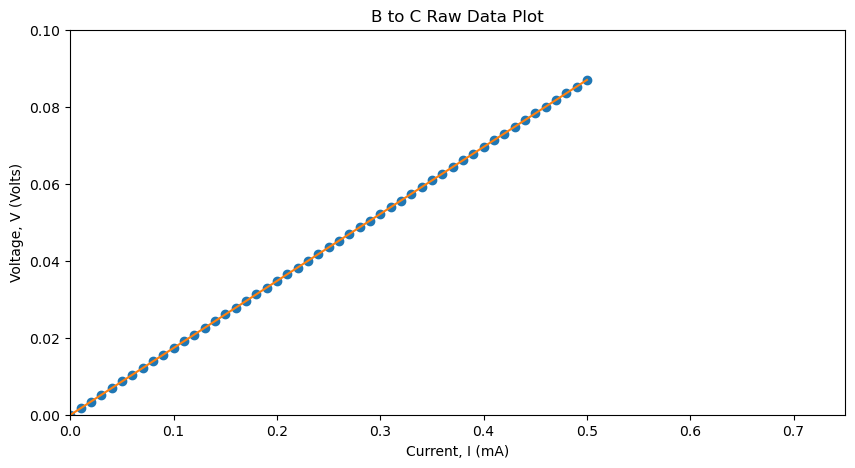

In [11]:
# Linear Fit Function:
def linFit(x, m, b):
    fit = m*x + b
    return fit


# Solve the Linear Fit:
popt, pcov = curve_fit(linFit, BC_x, BC_y, p0=[m:=0.75, b:=0]) # solves for m and b
y_fit = linFit(BC_x, *popt) # creates y(x) = gaus function with fitted values
uncertainties = np.sqrt(np.diag(pcov))


# Plot Results:
plt.figure(figsize=(10,5)) # set figure size
plt.xlim(0, 0.75) # x axis limits
plt.ylim(0, 0.1) # y axis limits
plt.xlabel("Current, I (mA)") # x axis label
plt.ylabel("Voltage, V (Volts)") # y axis label
plt.title("B to C Raw Data Plot") # plot title
plt.plot(BC_x, BC_y, 'o') # plot data
plt.plot(BC_x, y_fit) # plot linear fit
plt.show()

In [12]:
print(f"Resistance: {popt[0]}, Uncertainty: {uncertainties[0]}")

Resistance: 0.17407355542608433, Uncertainty: 5.7572091284844814e-06
